## CAPSTONE PROJECT - CLUSTERING

#### IMPORT PACKAGES

In [1]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from scipy.stats import chi2
from matplotlib import patches

#### READ DATASET

In [2]:
# Load data
df = pd.read_csv("marketing.csv")
df

,ID;tahun_lahir;Pendidikan;Status_pernikahan;Pendapatan;jumlah_anak;jumlah_remaja;tanggal_pendaftaran;recency;Spent_wine;Spent_buah;Spent_daging;Spent_ikan;Spent_emas
0,5524;1957;Graduation;Single;58138;0;0;04/09/20...
1,2174;1954;Graduation;Single;46344;1;1;08/03/20...
2,4141;1965;Graduation;Together;71613;0;0;21/08/...
3,6182;1984;Graduation;Together;26646;1;0;10/02/...
4,5324;1981;PhD;Married;58293;1;0;19/01/2014;94;...
...,...
2235,10870;1967;Graduation;Married;61223;0;1;13/06/...
2236,4001;1946;PhD;Together;64014;2;1;10/06/2014;56...
2237,7270;1981;Graduation;Divorced;56981;0;0;25/01/...
2238,8235;1956;Master;Together;69245;0;1;24/01/2014...


In [3]:
#menggunakan delimiter untuk memisahkan ;
# Load data
df = pd.read_csv("marketing.csv",delimiter=";")
df

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,42
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,5
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,43,182,42,247
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,0,30,0,8
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,48,217,32,24
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,30,214,80,61


#### PROBLEM STATEMENT

### Membuat Kolom Umur

In [4]:
df['tanggal_pendaftaran'].max()

'31/12/2013'

In [5]:
#Menambah kolom umur dengan mengurangi tahun terakhir tanggal pendaftaran yaitu 2013
df['Umur'] = 2013-df['tahun_lahir']
df

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88,56
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,6,59
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,42,48
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,5,29
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,15,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,43,182,42,247,46
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,0,30,0,8,67
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,48,217,32,24,32
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,30,214,80,61,57


### Membuat Kolom jumlah_hari

In [6]:
from datetime import datetime
# konversi kolom 'tanggal_pendaftaran' ke datetime format
df['tanggal_pendaftaran'] = pd.to_datetime(df['tanggal_pendaftaran'], format='%d/%m/%Y')

# ubah format tanggal
df['tanggal_pendaftaran'] = df['tanggal_pendaftaran'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))


In [7]:
df.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,56
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,6,59
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,42,48
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,5,29
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,32


In [8]:
from datetime import datetime

# konversi kolom 'tanggal_pendaftaran' ke datetime format
df['tanggal_pendaftaran'] = pd.to_datetime(df['tanggal_pendaftaran'], format='%Y-%m-%d')

# hitung selisih hari sejak tanggal pendaftaran hingga hari ini
today = datetime.today()
df['jumlah_hari'] = (today - df['tanggal_pendaftaran']).dt.days

In [9]:
df.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,56,3961
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,6,59,3411
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,42,48,3610
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,5,29,3437
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,32,3459


### Membuat Kolom age_group

In [10]:
import datetime
# membuat kolom age_group
bins = [26, 35, 45, 55, 100] # tentukan bin yang diinginkan
labels = ["26-35","36-45","46-55","55+"] # tentukan label untuk masing-masing bin
df['age_group'] = pd.cut(df['Umur'], bins=bins, labels=labels)

In [11]:
df.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,56,3961,55+
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,6,59,3411,55+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,42,48,3610,46-55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,5,29,3437,26-35
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,32,3459,26-35


#### EDA

### Melihat Tipe Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   tahun_lahir          2240 non-null   int64         
 2   Pendidikan           2240 non-null   object        
 3   Status_pernikahan    2240 non-null   object        
 4   Pendapatan           2216 non-null   float64       
 5   jumlah_anak          2240 non-null   int64         
 6   jumlah_remaja        2240 non-null   int64         
 7   tanggal_pendaftaran  2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   Spent_wine           2240 non-null   int64         
 10  Spent_buah           2240 non-null   int64         
 11  Spent_daging         2240 non-null   int64         
 12  Spent_ikan           2240 non-null   int64         
 13  Spent_emas           2240 non-nul

ID: nomor identifikasi unik untuk setiap individu dalam dataset.

tahun_lahir: tahun kelahiran individu.

Pendidikan: tingkat pendidikan individu.

Status_pernikahan: status pernikahan individu.

Pendapatan: pendapatan individu dalam satuan mata uang tertentu.

jumlah_anak: jumlah anak yang dimiliki oleh individu.

jumlah_remaja: jumlah remaja yang dimiliki oleh individu.

tanggal_pendaftaran: tanggal pendaftaran dalam dataset.

recency: waktu sejak pembelian terakhir oleh individu dalam satuan hari.

Spent_wine: total pengeluaran individu untuk membeli wine dalam satuan mata uang tertentu.

Spent_buah: total pengeluaran individu untuk membeli buah-buahan dalam satuan mata uang tertentu.

Spent_daging: total pengeluaran individu untuk membeli daging dalam satuan mata uang tertentu.

Spent_ikan: total pengeluaran individu untuk membeli ikan dalam satuan mata uang tertentu.

Spent_emas: total pengeluaran individu untuk membeli emas dalam satuan mata uang tertentu.


### Melihat Statistik pada kolom numerik

In [13]:
df.describe()

,ID,tahun_lahir,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,44.021875,44.194196,3651.582143
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,52.167439,11.984069,202.122512
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3298.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,9.000000,36.000000,3478.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,24.000000,43.000000,3653.500000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,56.000000,54.000000,3827.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,362.000000,120.000000,3997.000000


### Melihat range & mengecek outlier pada variable numerik

In [14]:
# Menampilkan kolom-kolom yang bertipe data numerik saja
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols]

,ID,tahun_lahir,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,56,3961
1,2174,1954,46344.0,1,1,38,11,1,6,2,6,59,3411
2,4141,1965,71613.0,0,0,26,426,49,127,111,42,48,3610
3,6182,1984,26646.0,1,0,26,11,4,20,10,5,29,3437
4,5324,1981,58293.0,1,0,94,173,43,118,46,15,32,3459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,247,46,3679
2236,4001,1946,64014.0,2,1,56,406,0,30,0,8,67,3317
2237,7270,1981,56981.0,0,0,91,908,48,217,32,24,32,3453
2238,8235,1956,69245.0,0,1,8,428,30,214,80,61,57,3454


### Mengecek Missing Value

In [15]:
df.isnull().sum()

ID                       0
tahun_lahir              0
Pendidikan               0
Status_pernikahan        0
Pendapatan              24
jumlah_anak              0
jumlah_remaja            0
tanggal_pendaftaran      0
recency                  0
Spent_wine               0
Spent_buah               0
Spent_daging             0
Spent_ikan               0
Spent_emas               0
Umur                     0
jumlah_hari              0
age_group              150
dtype: int64

Setelah dicek missing value nya terdapat jumlah missing pada Pendapatan sebanyak 24. Jumlah 24 cukup sedikit dibanding 2240 jadi lebih baik menggunakan nilai mean untuk mengisi jumlah missing pada Pendapatan

In [16]:
mmean = ['Pendapatan']
            
for feature in mmean:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].mean())

In [17]:
df.isnull().sum()

ID                       0
tahun_lahir              0
Pendidikan               0
Status_pernikahan        0
Pendapatan               0
jumlah_anak              0
jumlah_remaja            0
tanggal_pendaftaran      0
recency                  0
Spent_wine               0
Spent_buah               0
Spent_daging             0
Spent_ikan               0
Spent_emas               0
Umur                     0
jumlah_hari              0
age_group              150
dtype: int64

### Mengcek apakah ada data yang duplicate

In [18]:
df.duplicated().sum()

0

### Melihat range & mengecek outlier pada variable numerik

### Tahun Lahir

Range tahun_lahir: 103


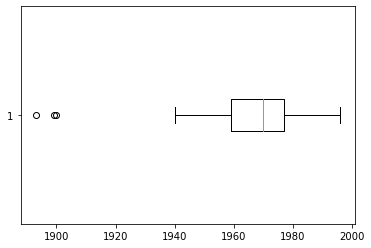

In [19]:
# melihat range pada kolom numerik 'tahun Lahir'
print('Range tahun_lahir:', df['tahun_lahir'].max() - df['tahun_lahir'].min())

# membuat box plot pada kolom numerik 'tahun_lahir'
plt.boxplot(df['tahun_lahir'],vert= False)
plt.show()

### Pendapatan

Range pendapatan: 664936.0


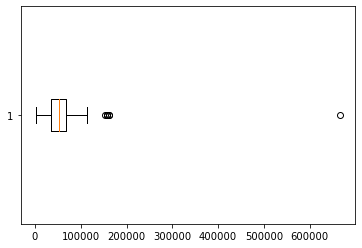

In [20]:
# melihat range pada kolom numerik 'Pendapatan'
print('Range pendapatan:', df['Pendapatan'].max() - df['Pendapatan'].min())

# membuat box plot pada kolom numerik 'Pendapatan'
plt.boxplot(df['Pendapatan'],vert=False)
plt.show()

### jumlah_anak

Range jumlah_anak: 2


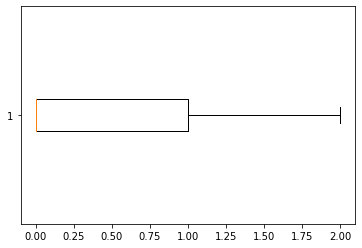

In [21]:
# melihat range pada kolom numerik 'jumlah_anak'
print('Range jumlah_anak:', df['jumlah_anak'].max() - df['jumlah_anak'].min())

# membuat box plot pada kolom numerik 'jumalh_anak'
plt.boxplot(df['jumlah_anak'], vert=False)
plt.show()

### jumlah_remaja

Range Jumlah_remaja: 2


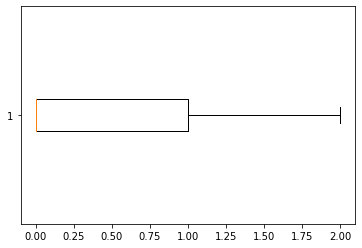

In [22]:
# melihat range pada kolom numerik 'jumlah_remaja'
print('Range Jumlah_remaja:', df['jumlah_remaja'].max() - df['jumlah_remaja'].min())

# membuat box plot pada kolom numerik 'jumlah_remaja'
plt.boxplot(df['jumlah_remaja'],vert= False)
plt.show()

### recency

Range recency: 99


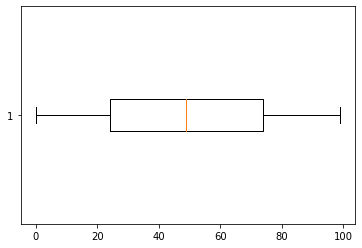

In [23]:
# melihat range pada kolom numerik 'recency'
print('Range recency:', df['recency'].max() - df['recency'].min())

# membuat box plot pada kolom numerik 'recency'
plt.boxplot(df['recency'], vert=False)
plt.show()

### Spent_wine

Range spent_wine: 1493


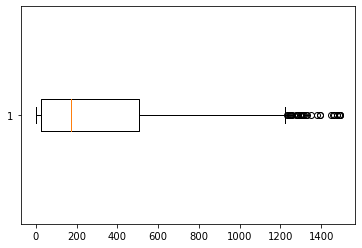

In [24]:
# melihat range pada kolom numerik 'spent_wine'
print('Range spent_wine:', df['Spent_wine'].max() - df['Spent_wine'].min())

# membuat box plot pada kolom numerik 'spent_wine'
plt.boxplot(df['Spent_wine'], vert= False)
plt.show()

### Spent_buah

Range Spent_buah: 199


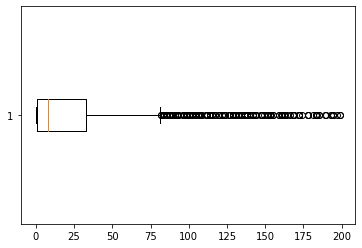

In [25]:
# melihat range pada kolom numerik 'Spent_buah'
print('Range Spent_buah:', df['Spent_buah'].max() - df['Spent_buah'].min())

# membuat box plot pada kolom numerik 'Spent_buah'
plt.boxplot(df['Spent_buah'], vert=False)
plt.show()

### Spent_daging

Range Spent_Daging: 1725


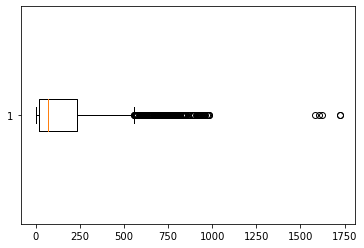

In [26]:
# melihat range pada kolom numerik 'Spent_daging'
print('Range Spent_Daging:', df['Spent_daging'].max() - df['Spent_daging'].min())

# membuat box plot pada kolom numerik 'Spent_daging'
plt.boxplot(df['Spent_daging'], vert= False)
plt.show()

### Spent_ikan

Range spent_ikan : 259


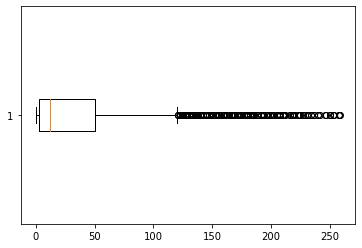

In [27]:
# melihat range pada kolom numerik 'spent_ikan'
print('Range spent_ikan :', df['Spent_ikan'].max() - df['Spent_ikan'].min())

# membuat box plot pada kolom numerik 'Spent_ikan'
plt.boxplot(df['Spent_ikan'], vert= False)
plt.show()

### Spent_emas

Range Spent_Emas : 362


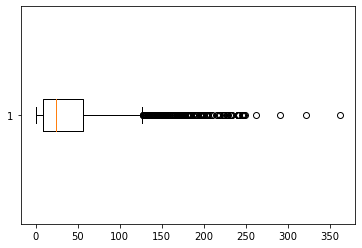

In [28]:
# melihat range pada kolom numerik 'spent_emas'
print('Range Spent_Emas :', df['Spent_emas'].max() - df['Spent_emas'].min())

# membuat box plot pada kolom numerik 'spent_emas'
plt.boxplot(df['Spent_emas'], vert= False)
plt.show()

## MelihatFrekuensi Value di Kolom Numerik

### Frekuensi Kolom tahun_lahir

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: tahun_lahir, dtype: int64


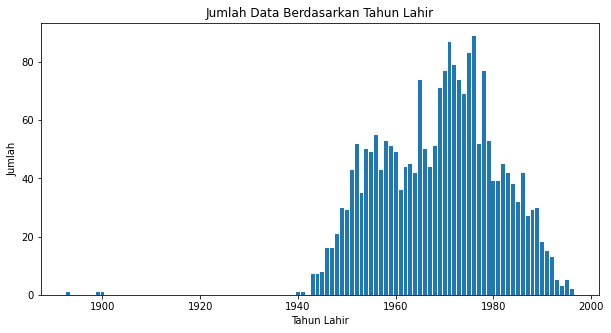

In [29]:
a=df['tahun_lahir'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a.index, a.values)
ax.set_xlabel('Tahun Lahir')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Data Berdasarkan Tahun Lahir')
print(a)
plt.show()

### Frekuensi Kolom Pendapatan

In [30]:
df['Pendapatan'].value_counts()

52247.251354    24
7500.000000     12
35860.000000     4
37760.000000     3
83844.000000     3
                ..
40760.000000     1
41452.000000     1
6835.000000      1
33622.000000     1
52869.000000     1
Name: Pendapatan, Length: 1975, dtype: int64

### Frekuensi Kolom jumlah_anak

0    1293
1     899
2      48
Name: jumlah_anak, dtype: int64


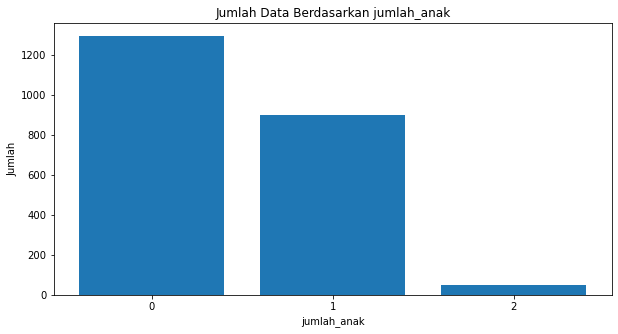

In [31]:
a=df['jumlah_anak'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a.index, a.values)
ax.set_xlabel('jumlah_anak')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Data Berdasarkan jumlah_anak')
ax.set_xticks(a.index)
print(a)
plt.show()

### Frekuensi Kolom jumlah_remaja

0    1158
1    1030
2      52
Name: jumlah_remaja, dtype: int64


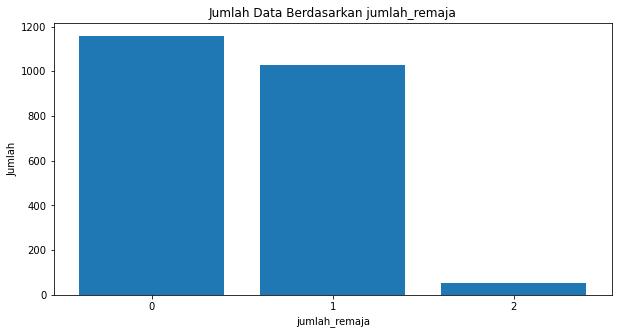

In [32]:
a=df['jumlah_remaja'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(a.index, a.values)
ax.set_xlabel('jumlah_remaja')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Data Berdasarkan jumlah_remaja')
ax.set_xticks(a.index)
print(a)
plt.show()

### Frekuensi Kolom recency

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: recency, Length: 100, dtype: int64


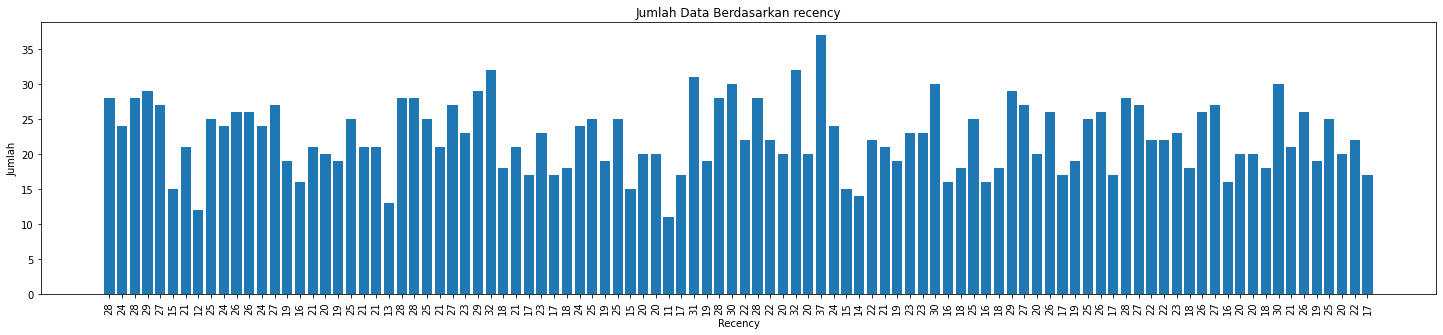

In [33]:
a=df['recency'].value_counts()
fig, ax = plt.subplots(figsize=(25,5))
ax.bar(a.index, a.values)
ax.set_xlabel('Recency')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Data Berdasarkan recency')
ax.set_xticks(a.index)
ax.set_xticklabels(a, rotation=90)
print(a)
plt.show()

### Frekuensi Kolom Spent_buah

In [34]:
a=df['Spent_buah'].value_counts()
a

0      400
1      162
2      120
3      116
4      104
      ... 
164      1
130      1
189      1
101      1
154      1
Name: Spent_buah, Length: 158, dtype: int64

### Frekuensi Kolom Spent_daging

In [35]:
a=df['Spent_daging'].value_counts()
a

7      53
5      50
11     49
8      46
6      43
       ..
116     1
569     1
685     1
354     1
182     1
Name: Spent_daging, Length: 558, dtype: int64

### Frekuensi Kolom Spent_ikan

In [36]:
a=df['Spent_ikan'].value_counts()
a

0      384
2      156
3      130
4      108
6       82
      ... 
232      1
167      1
247      1
194      1
229      1
Name: Spent_ikan, Length: 182, dtype: int64

### Frekuensi Kolom Spent_emas

In [37]:
a=df['Spent_emas'].value_counts()
a

1      73
4      70
3      69
5      63
12     63
       ..
178     1
169     1
132     1
262     1
247     1
Name: Spent_emas, Length: 213, dtype: int64

### Frekuensi Kolom Umur

In [38]:
a=df['Umur'].value_counts()
a

37     89
42     87
38     83
41     79
35     77
43     77
40     74
48     74
44     71
39     69
57     55
55     53
34     53
61     52
36     52
45     51
54     51
47     50
59     50
58     49
53     49
31     45
50     45
46     44
51     44
56     43
62     43
30     42
27     42
49     42
33     39
32     39
29     38
52     36
60     35
28     32
24     30
64     30
63     29
25     29
26     27
65     21
23     18
67     16
66     16
22     15
21     13
68      8
70      7
69      7
20      5
18      5
19      3
17      2
114     1
72      1
120     1
113     1
73      1
Name: Umur, dtype: int64

## Mengeksplorasi hubugan dan Frekuensi antara kolum kategori ( x-Axis) dan Column Numerik ( Y Axis)

### Pendidikan 

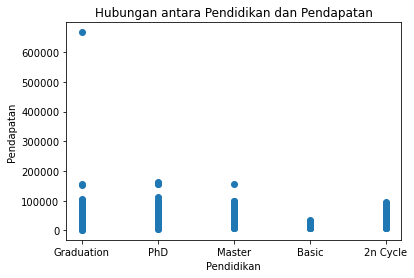

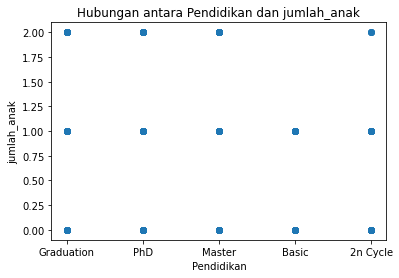

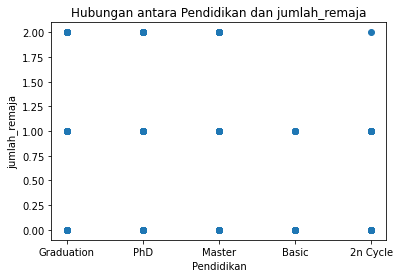

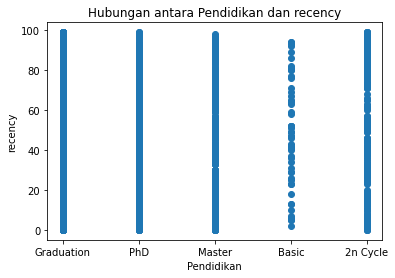

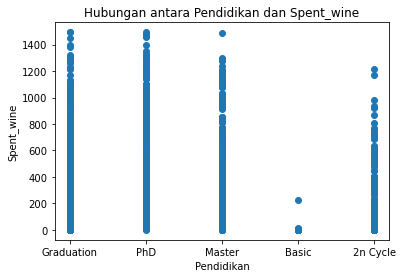

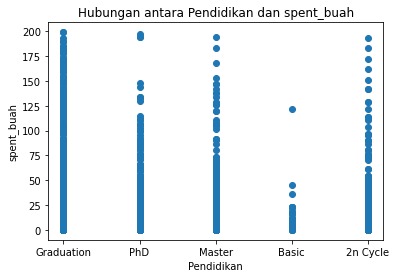

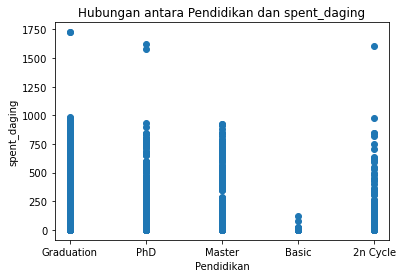

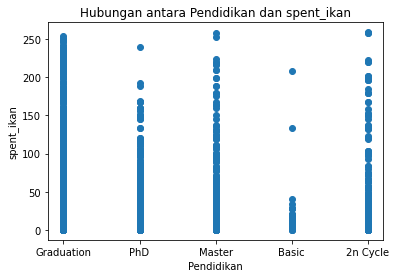

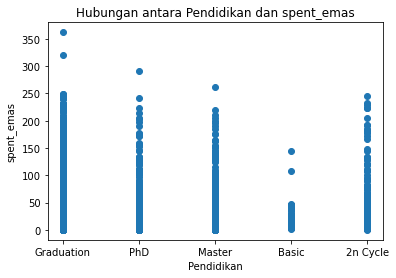

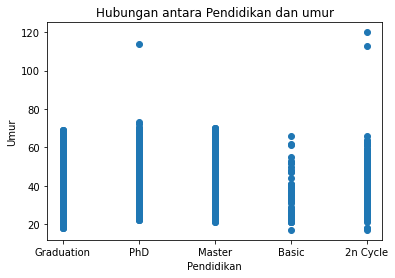

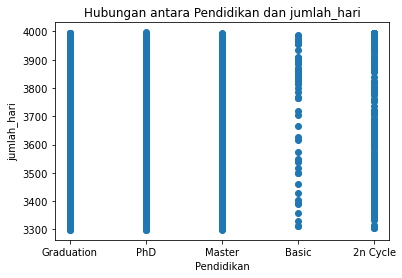

In [39]:
#Pendidikan
plt.scatter(df['Pendidikan'], df['Pendapatan'])
plt.xlabel('Pendidikan')
plt.ylabel('Pendapatan')
plt.title('Hubungan antara Pendidikan dan Pendapatan')
plt.show()

plt.scatter(df['Pendidikan'], df['jumlah_anak'])
plt.xlabel('Pendidikan')
plt.ylabel('jumlah_anak')
plt.title('Hubungan antara Pendidikan dan jumlah_anak')
plt.show()

plt.scatter(df['Pendidikan'], df['jumlah_remaja'])
plt.xlabel('Pendidikan')
plt.ylabel('jumlah_remaja')
plt.title('Hubungan antara Pendidikan dan jumlah_remaja')
plt.show()

plt.scatter(df['Pendidikan'], df['recency'])
plt.xlabel('Pendidikan')
plt.ylabel('recency')
plt.title('Hubungan antara Pendidikan dan recency')
plt.show()

plt.scatter(df['Pendidikan'], df['Spent_wine'])
plt.xlabel('Pendidikan')
plt.ylabel('Spent_wine')
plt.title('Hubungan antara Pendidikan dan Spent_wine')
plt.show()

plt.scatter(df['Pendidikan'], df['Spent_buah'])
plt.xlabel('Pendidikan')
plt.ylabel('spent_buah')
plt.title('Hubungan antara Pendidikan dan spent_buah')
plt.show()

plt.scatter(df['Pendidikan'], df['Spent_daging'])
plt.xlabel('Pendidikan')
plt.ylabel('spent_daging')
plt.title('Hubungan antara Pendidikan dan spent_daging')
plt.show()

plt.scatter(df['Pendidikan'], df['Spent_ikan'])
plt.xlabel('Pendidikan')
plt.ylabel('spent_ikan')
plt.title('Hubungan antara Pendidikan dan spent_ikan')
plt.show()

plt.scatter(df['Pendidikan'], df['Spent_emas'])
plt.xlabel('Pendidikan')
plt.ylabel('spent_emas')
plt.title('Hubungan antara Pendidikan dan spent_emas')
plt.show()

plt.scatter(df['Pendidikan'], df['Umur'])
plt.xlabel('Pendidikan')
plt.ylabel('Umur')
plt.title('Hubungan antara Pendidikan dan umur')
plt.show()

plt.scatter(df['Pendidikan'], df['jumlah_hari'])
plt.xlabel('Pendidikan')
plt.ylabel('jumlah_hari')
plt.title('Hubungan antara Pendidikan dan jumlah_hari')
plt.show()

### Status_pernikahan

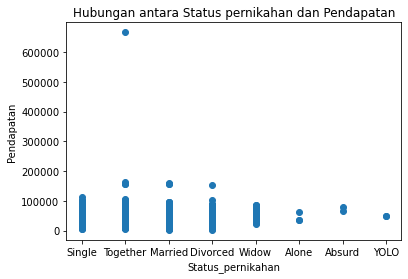

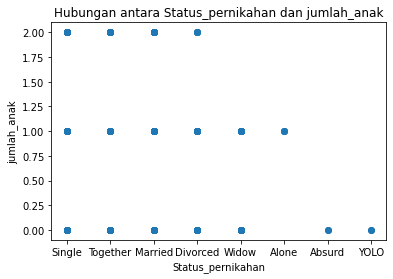

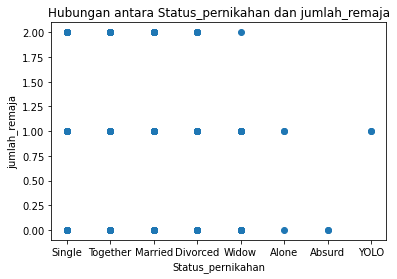

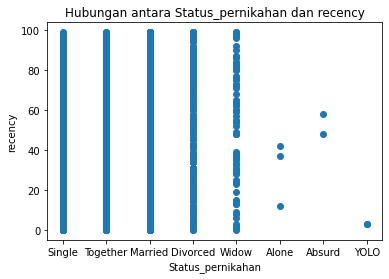

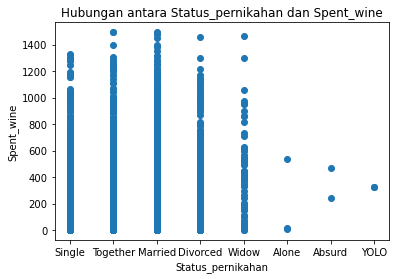

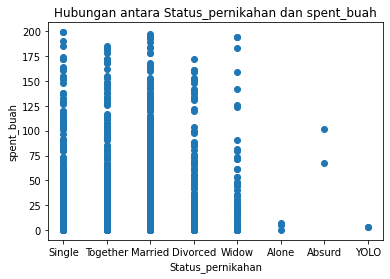

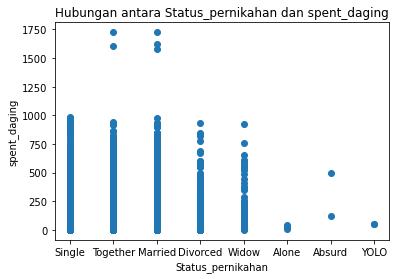

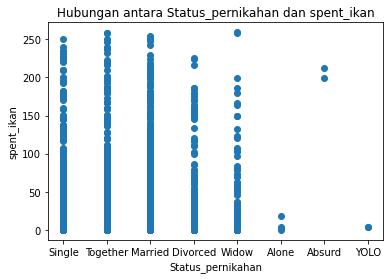

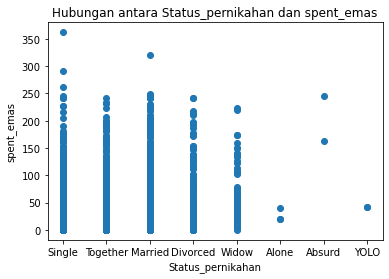

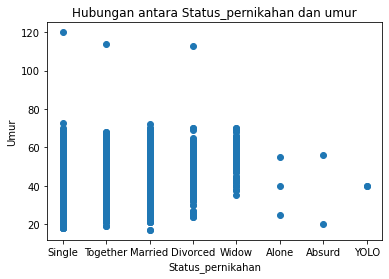

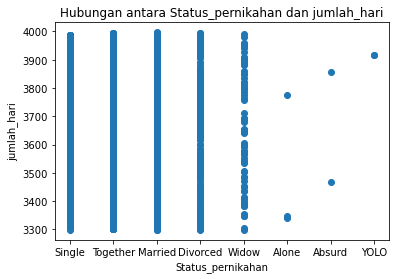

In [40]:
#Pendidikan
plt.scatter(df['Status_pernikahan'], df['Pendapatan'])
plt.xlabel('Status_pernikahan')
plt.ylabel('Pendapatan')
plt.title('Hubungan antara Status pernikahan dan Pendapatan')
plt.show()

plt.scatter(df['Status_pernikahan'], df['jumlah_anak'])
plt.xlabel('Status_pernikahan')
plt.ylabel('jumlah_anak')
plt.title('Hubungan antara Status_pernikahan dan jumlah_anak')
plt.show()

plt.scatter(df['Status_pernikahan'], df['jumlah_remaja'])
plt.xlabel('Status_pernikahan')
plt.ylabel('jumlah_remaja')
plt.title('Hubungan antara Status_pernikahan dan jumlah_remaja')
plt.show()

plt.scatter(df['Status_pernikahan'], df['recency'])
plt.xlabel('Status_pernikahan')
plt.ylabel('recency')
plt.title('Hubungan antara Status_pernikahan dan recency')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Spent_wine'])
plt.xlabel('Status_pernikahan')
plt.ylabel('Spent_wine')
plt.title('Hubungan antara Status_pernikahan dan Spent_wine')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Spent_buah'])
plt.xlabel('Status_pernikahan')
plt.ylabel('spent_buah')
plt.title('Hubungan antara Status_pernikahan dan spent_buah')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Spent_daging'])
plt.xlabel('Status_pernikahan')
plt.ylabel('spent_daging')
plt.title('Hubungan antara Status_pernikahan dan spent_daging')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Spent_ikan'])
plt.xlabel('Status_pernikahan')
plt.ylabel('spent_ikan')
plt.title('Hubungan antara Status_pernikahan dan spent_ikan')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Spent_emas'])
plt.xlabel('Status_pernikahan')
plt.ylabel('spent_emas')
plt.title('Hubungan antara Status_pernikahan dan spent_emas')
plt.show()

plt.scatter(df['Status_pernikahan'], df['Umur'])
plt.xlabel('Status_pernikahan')
plt.ylabel('Umur')
plt.title('Hubungan antara Status_pernikahan dan umur')
plt.show()

plt.scatter(df['Status_pernikahan'], df['jumlah_hari'])
plt.xlabel('Status_pernikahan')
plt.ylabel('jumlah_hari')
plt.title('Hubungan antara Status_pernikahan dan jumlah_hari')
plt.show()

#### DATA PRE-PROCESSING

In [41]:
# Data kategori
categorical = ["Pendidikan", "Status_pernikahan","age_group"]
df_categorical = df[categorical]
df_categorical.head()

,Pendidikan,Status_pernikahan,age_group
0,Graduation,Single,55+
1,Graduation,Single,55+
2,Graduation,Together,46-55
3,Graduation,Together,26-35
4,PhD,Married,26-35


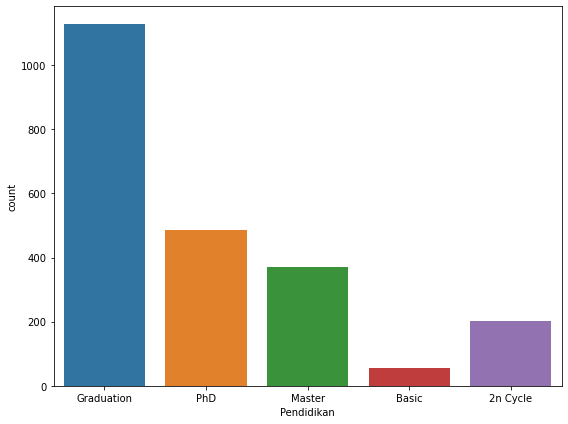

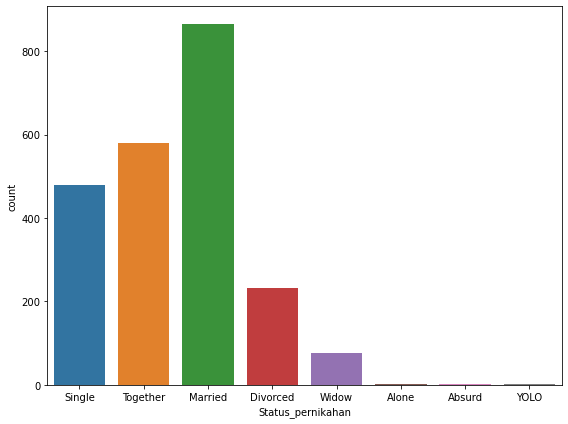

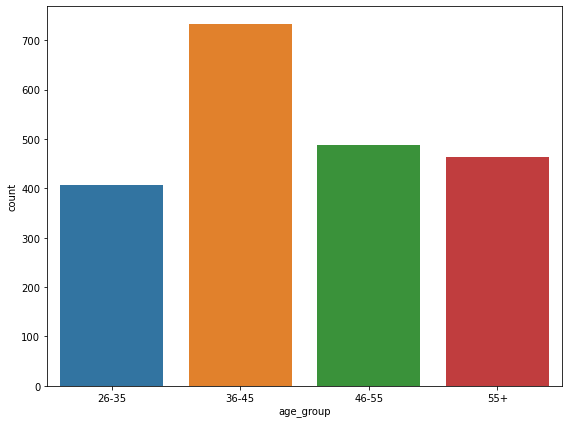

In [42]:
# Melihat perbandingan data kategori disetiap kolom
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

Dari chart pertama tentang pendidikan terlihat bahwa graduation mendominasi dengan urutan terbanyak pertama >1000, kedua ada Phd >400, ketiga Master Pendidikan >200, keempat 2n Cycle 200, dan terakhir Basic <200

Dari chart kedua yaitu Status_pernikahan dengan maried mendominasi urutan pertama sebanyak >800, kedua ada Together >500, ketiga ada Single >400, keempat Divorced >200, kelima ada widow <200, dan disusul yang lainnya ada Alone, dan YOLO

Karena Data Alone, Absurd dan YOLO memiliki jumlah yang sangat sedikit dan hampir tidak ada maka lebih baik dihilangkan status Alone, Absurd dan YOLO

In [43]:
df = df[~df['Status_pernikahan'].isin(['Alone','Absurd', 'YOLO'])]

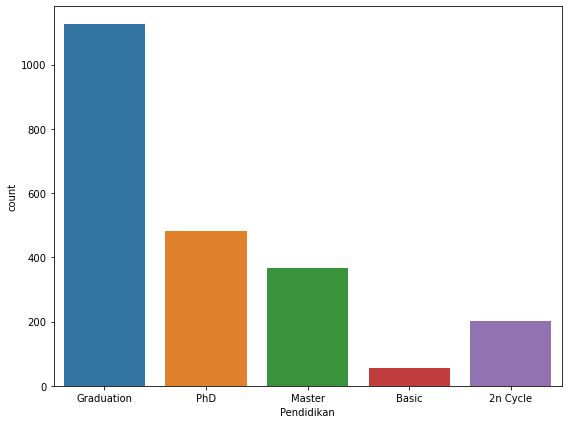

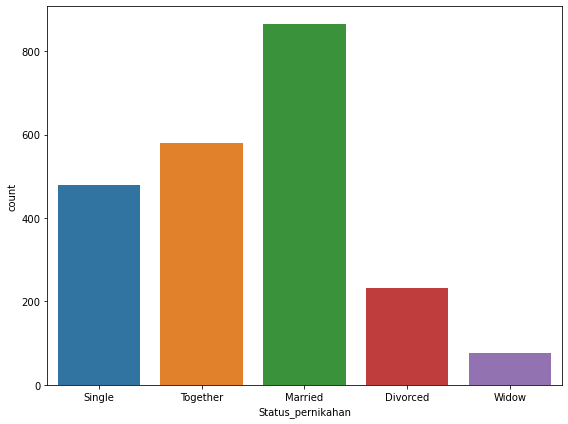

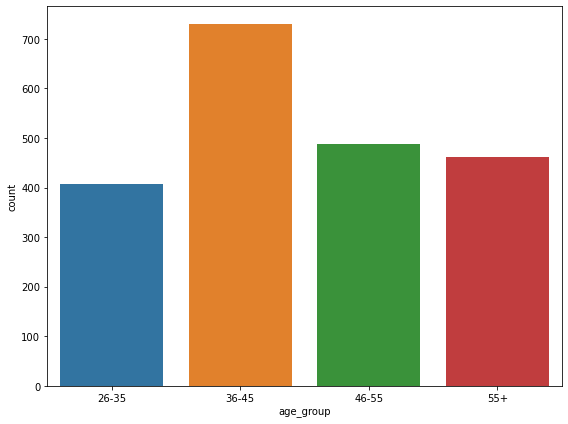

In [44]:
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

## Handling Outlier

### Umur

In [45]:
df.groupby('Umur').size().reset_index(name="jumlah")

,Umur,jumlah
0,17,2
1,18,5
2,19,3
3,20,4
4,21,13
5,22,15
6,23,18
7,24,30
8,25,28
9,26,27


In [46]:
#hapus saja yang jumlahnya 1
df = df.drop(df[df['Umur'] >= 72].index)

In [47]:
df.groupby('Umur').size().reset_index(name="jumlah")

,Umur,jumlah
0,17,2
1,18,5
2,19,3
3,20,4
4,21,13
5,22,15
6,23,18
7,24,30
8,25,28
9,26,27


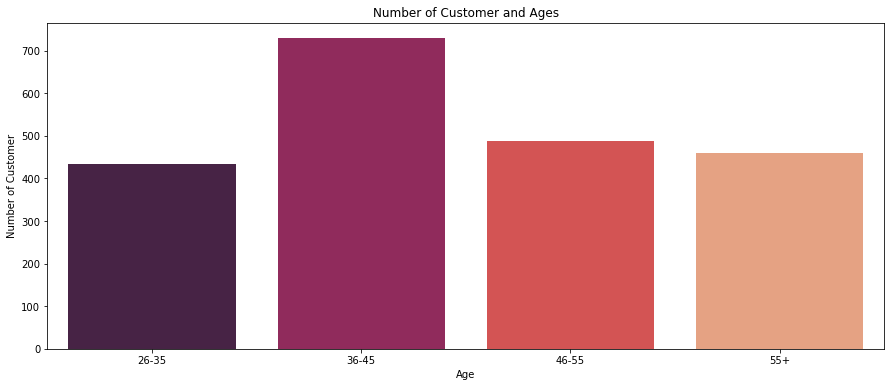

In [48]:
# Menggolongkan usia dan melihat persebarannya dalam data

age26_35 = df.Umur[(df.Umur <= 35) & (df.Umur >= 26)]
age36_45 = df.Umur[(df.Umur <= 45) & (df.Umur >= 36)]
age46_55 = df.Umur[(df.Umur <= 55) & (df.Umur >= 46)]
age55above = df.Umur[df.Umur >= 56]

x = ["26-35","36-45","46-55","55+"]
y = [len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### age_group

In [49]:
df.groupby('age_group').size().reset_index(name="jumlah")

,age_group,jumlah
0,26-35,407
1,36-45,729
2,46-55,487
3,55+,460


In [50]:
df.isna().sum()

ID                       0
tahun_lahir              0
Pendidikan               0
Status_pernikahan        0
Pendapatan               0
jumlah_anak              0
jumlah_remaja            0
tanggal_pendaftaran      0
recency                  0
Spent_wine               0
Spent_buah               0
Spent_daging             0
Spent_ikan               0
Spent_emas               0
Umur                     0
jumlah_hari              0
age_group              145
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.isna().sum()

ID                     0
tahun_lahir            0
Pendidikan             0
Status_pernikahan      0
Pendapatan             0
jumlah_anak            0
jumlah_remaja          0
tanggal_pendaftaran    0
recency                0
Spent_wine             0
Spent_buah             0
Spent_daging           0
Spent_ikan             0
Spent_emas             0
Umur                   0
jumlah_hari            0
age_group              0
dtype: int64

In [53]:
df

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,56,3961,55+
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,6,59,3411,55+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,42,48,3610,46-55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,5,29,3437,26-35
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,32,3459,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,247,46,3679,46-55
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,8,67,3317,55+
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,24,32,3453,26-35
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,61,57,3454,55+


### Mengapus Kolom tanggal_pendaftaran

In [54]:
df.drop("tanggal_pendaftaran",axis=1,inplace=True)

In [55]:
df

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,247,46,3679,46-55
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,8,67,3317,55+
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,24,32,3453,26-35
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,61,57,3454,55+


In [56]:
def clean_outlier(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = dataframe[~((dataframe < lower_bound) | (dataframe > upper_bound)).any(axis=1)]
    return cleaned_data

In [57]:
# tampilkan data yang telah dibersihkan
print("Data setelah dibersihkan outlier:")
print(df)

Data setelah dibersihkan outlier:
         ID  tahun_lahir  Pendidikan Status_pernikahan  Pendapatan  \
0      5524         1957  Graduation            Single     58138.0   
1      2174         1954  Graduation            Single     46344.0   
2      4141         1965  Graduation          Together     71613.0   
3      6182         1984  Graduation          Together     26646.0   
4      5324         1981         PhD           Married     58293.0   
...     ...          ...         ...               ...         ...   
2235  10870         1967  Graduation           Married     61223.0   
2236   4001         1946         PhD          Together     64014.0   
2237   7270         1981  Graduation          Divorced     56981.0   
2238   8235         1956      Master          Together     69245.0   
2239   9405         1954         PhD           Married     52869.0   

      jumlah_anak  jumlah_remaja  recency  Spent_wine  Spent_buah  \
0               0              0       58         635   

In [58]:
df.isna().sum()

ID                   0
tahun_lahir          0
Pendidikan           0
Status_pernikahan    0
Pendapatan           0
jumlah_anak          0
jumlah_remaja        0
recency              0
Spent_wine           0
Spent_buah           0
Spent_daging         0
Spent_ikan           0
Spent_emas           0
Umur                 0
jumlah_hari          0
age_group            0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 2083 non-null   int64   
 1   tahun_lahir        2083 non-null   int64   
 2   Pendidikan         2083 non-null   object  
 3   Status_pernikahan  2083 non-null   object  
 4   Pendapatan         2083 non-null   float64 
 5   jumlah_anak        2083 non-null   int64   
 6   jumlah_remaja      2083 non-null   int64   
 7   recency            2083 non-null   int64   
 8   Spent_wine         2083 non-null   int64   
 9   Spent_buah         2083 non-null   int64   
 10  Spent_daging       2083 non-null   int64   
 11  Spent_ikan         2083 non-null   int64   
 12  Spent_emas         2083 non-null   int64   
 13  Umur               2083 non-null   int64   
 14  jumlah_hari        2083 non-null   int64   
 15  age_group          2083 non-null   category
dtypes: cat

#### FEATURE ENGINEERING

In [60]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom dengan data kategori
cluster_data = pd.concat([encoded_data, df[['ID','tahun_lahir','Pendidikan','Status_pernikahan','Pendapatan','jumlah_anak','jumlah_remaja','recency','Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas','Umur','jumlah_hari','age_group']]], axis=1)

cluster_data.head()

,Pendidikan,Status_pernikahan,age_group,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group
0,2,2,3,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+
1,2,2,3,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+
2,2,3,2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55
3,2,3,0,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35
4,4,1,0,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35


In [61]:
# Drop variabel yang tidak dibutuhkan
cluster_data = cluster_data.drop(['ID','tahun_lahir','Pendidikan','Status_pernikahan','Umur','jumlah_anak','jumlah_remaja','recency','jumlah_hari','age_group'], axis = 1)
cluster_data.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,58138.0,635,88,546,172,88
1,46344.0,11,1,6,2,6
2,71613.0,426,49,127,111,42
3,26646.0,11,4,20,10,5
4,58293.0,173,43,118,46,15


## Scaling Data

Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [62]:
# Data Scaling
scaler = StandardScaler()
cluster_data[['Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas']] = scaler.fit_transform(df[['Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas']])
cluster_data.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,58138.0,0.988493,1.597222,1.734263,2.478412,0.851359
1,46344.0,-0.877248,-0.631993,-0.706470,-0.641021,-0.722881
2,71613.0,0.363589,0.597919,-0.159565,1.359086,-0.031751
3,26646.0,-0.877248,-0.555123,-0.643191,-0.494224,-0.742079
4,58293.0,-0.392873,0.444180,-0.200244,0.166362,-0.550098


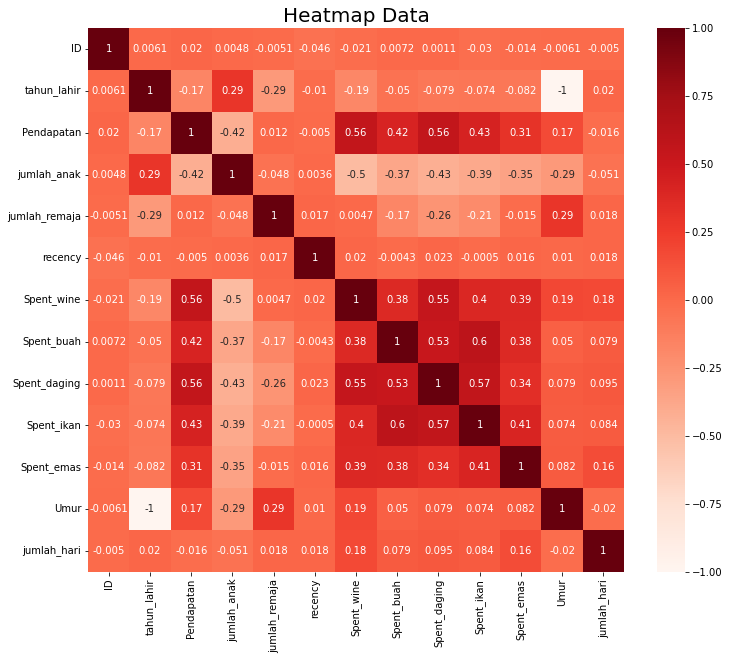

In [63]:
# Features Selection
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap = 'Reds', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [64]:
df.isna().sum()

ID                   0
tahun_lahir          0
Pendidikan           0
Status_pernikahan    0
Pendapatan           0
jumlah_anak          0
jumlah_remaja        0
recency              0
Spent_wine           0
Spent_buah           0
Spent_daging         0
Spent_ikan           0
Spent_emas           0
Umur                 0
jumlah_hari          0
age_group            0
dtype: int64

#### MODELING

In [65]:
#Membagai dataset jadi 5 untuk masing - masing spent
spent_wine = cluster_data.drop(columns = ['Pendapatan','Spent_buah','Spent_daging','Spent_ikan','Spent_emas'])
spent_daging = cluster_data.drop(columns = ['Pendapatan','Spent_wine','Spent_buah','Spent_ikan','Spent_emas'])
spent_buah = cluster_data.drop(columns = ['Pendapatan','Spent_wine','Spent_daging','Spent_ikan','Spent_emas'])
spent_ikan = cluster_data.drop(columns = ['Pendapatan','Spent_wine','Spent_buah','Spent_daging','Spent_emas'])
spent_emas = cluster_data.drop(columns = ['Pendapatan','Spent_wine','Spent_buah','Spent_daging','Spent_ikan'])

In [66]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

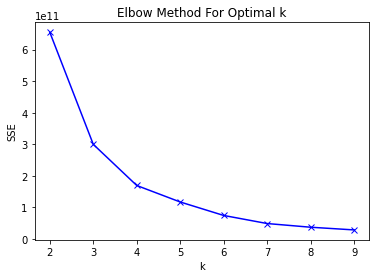

In [67]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

#### EVALUATION

In [68]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

For n_clusters = 2, silhouette score is 0.5888283112547402
For n_clusters = 3, silhouette score is 0.5932802417318915


C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 4, silhouette score is 0.5461808022983039


C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 5, silhouette score is 0.522259753027241
For n_clusters = 6, silhouette score is 0.5399705013842945


C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

For n_clusters = 7, silhouette score is 0.543768051320943


C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 8, silhouette score is 0.5312260224924139


C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


For n_clusters = 9, silhouette score is 0.520373746765919


In [69]:
# melakukan reset indeks pada cleaned_data dan spent_wine
cleaned_data = df.reset_index(drop=True)
spent_wine = spent_wine.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=2)
cluster.fit(spent_wine)

# membuat series hasil clustering
segment_wine = pd.Series(cluster.labels_, name="segment_wine")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([cleaned_data, segment_wine], axis=1)

# menampilkan hasil
results

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group,segment_wine
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,247,46,3679,46-55,1
2079,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,8,67,3317,55+,0
2080,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,24,32,3453,26-35,1
2081,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,61,57,3454,55+,0


In [70]:
# melakukan reset indeks pada cleaned_data dan spent_buah
cleaned_data = df.reset_index(drop=True)
spent_buah = spent_buah.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=2)
cluster.fit(spent_buah)

# membuat series hasil clustering
segment_buah = pd.Series(cluster.labels_, name="segment_buah")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_buah], axis=1)

# menampilkan hasil
results

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group,segment_wine,segment_buah
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35,0,1
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,247,46,3679,46-55,1,1
2079,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,8,67,3317,55+,0,1
2080,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,24,32,3453,26-35,1,1
2081,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,61,57,3454,55+,0,1


In [71]:
# melakukan reset indeks pada cleaned_data dan spent_wine
cleaned_data = cleaned_data.reset_index(drop=True)
spent_daging = spent_daging.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=2)
cluster.fit(spent_daging)

# membuat series hasil clustering
segment_daging = pd.Series(cluster.labels_, name="segment_daging")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_daging], axis=1)

# menampilkan hasil
results

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group,segment_wine,segment_buah,segment_daging
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+,1,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+,0,1,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,247,46,3679,46-55,1,1,0
2079,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,8,67,3317,55+,0,1,0
2080,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,24,32,3453,26-35,1,1,0
2081,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,61,57,3454,55+,0,1,0


In [72]:
# melakukan reset indeks pada cleaned_data dan spent_wine
cleaned_data = cleaned_data.reset_index(drop=True)
spent_ikan = spent_ikan.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=2)
cluster.fit(spent_ikan)

# membuat series hasil clustering
segment_ikan = pd.Series(cluster.labels_, name="segment_ikan")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_ikan], axis=1)

# menampilkan hasil
results

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group,segment_wine,segment_buah,segment_daging,segment_ikan
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,56,3961,55+,1,0,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,6,59,3411,55+,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,42,48,3610,46-55,0,1,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,5,29,3437,26-35,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,15,32,3459,26-35,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,247,46,3679,46-55,1,1,0,0
2079,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,8,67,3317,55+,0,1,0,0
2080,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,24,32,3453,26-35,1,1,0,0
2081,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,61,57,3454,55+,0,1,0,0


In [73]:
# melakukan reset indeks pada cleaned_data dan spent_wine
cleaned_data = cleaned_data.reset_index(drop=True)
spent_emas = spent_emas.reset_index(drop=True)

# melakukan k-means clustering
cluster = KMeans(n_clusters=2)
cluster.fit(spent_emas)

# membuat series hasil clustering
segment_emas = pd.Series(cluster.labels_, name="segment_emas")

# menggabungkan hasil clustering dengan data awal
results = pd.concat([results, segment_emas], axis=1)

# menampilkan hasil
results

C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,...,Spent_ikan,Spent_emas,Umur,jumlah_hari,age_group,segment_wine,segment_buah,segment_daging,segment_ikan,segment_emas
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,56,3961,55+,1,0,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,6,59,3411,55+,0,1,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,42,48,3610,46-55,0,1,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,5,29,3437,26-35,0,1,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,15,32,3459,26-35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,42,247,46,3679,46-55,1,1,0,0,1
2079,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,8,67,3317,55+,0,1,0,0,0
2080,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,32,24,32,3453,26-35,1,1,0,0,0
2081,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,80,61,57,3454,55+,0,1,0,0,0


In [74]:
segment = pd.Series(cluster.labels_, name="segment")

In [75]:
results = pd.concat([results, segment], axis=1)
results.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,...,Spent_emas,Umur,jumlah_hari,age_group,segment_wine,segment_buah,segment_daging,segment_ikan,segment_emas,segment
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,88,56,3961,55+,1,0,1,1,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,6,59,3411,55+,0,1,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,42,48,3610,46-55,0,1,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,5,29,3437,26-35,0,1,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,15,32,3459,26-35,0,1,0,0,0,0


In [76]:
Qp12 = results['Pendapatan'].quantile(0.25) 
Qp32 = results['Pendapatan'].quantile(0.75) 
IQRp = Qp32-Qp12 
print("Nilai Kuartil 1 : " ,Qp12)
print("Nilai Kuartil 3 : " ,Qp32)
print("Nilai Rentang : " ,IQRp)

print('Data sebelum di hilangkan outliernya :',results.shape)
results = results[~((results['Pendapatan']>(Qp32+(1.5*IQRp))))]
print('Data sesudah dihilangkan outliernya :',results.shape)

Nilai Kuartil 1 :  36091.5
Nilai Kuartil 3 :  67839.5
Nilai Rentang :  31748.0
Data sebelum di hilangkan outliernya : (2083, 22)
Data sesudah dihilangkan outliernya : (2075, 22)


In [77]:
res_wine_0 = results[results["segment_wine"]==0]
res_wine_1 = results[results["segment_wine"]==1]

res_buah_0 = results[results["segment_buah"]==0]
res_buah_1 = results[results["segment_buah"]==1]

res_daging_0 = results[results["segment_daging"]==0]
res_daging_1 = results[results["segment_daging"]==1]

res_ikan_0 = results[results["segment_ikan"]==0]
res_ikan_1 = results[results["segment_ikan"]==1]


res_emas_0 = results[results["segment_emas"]==0]
res_emas_1 = results[results["segment_emas"]==1]

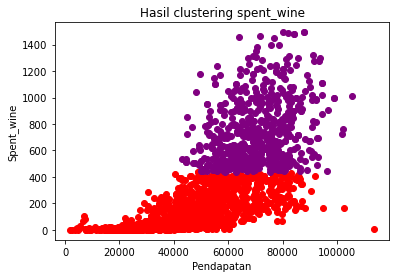

In [78]:
#Plot hasil scatter spent_wine
plt.scatter(res_wine_0['Pendapatan'],res_wine_0['Spent_wine'],color = 'red')
plt.scatter(res_wine_1['Pendapatan'],res_wine_1['Spent_wine'], color = 'purple')

plt.xlabel('Pendapatan')
plt.ylabel('Spent_wine')
plt.title('Hasil clustering spent_wine')
plt.show()

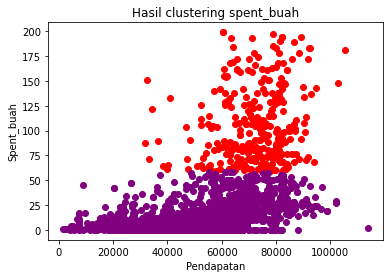

In [79]:
#Plot hasil scatter spent_buah
plt.scatter(res_buah_0['Pendapatan'],res_buah_0['Spent_buah'],color='red')
plt.scatter(res_buah_1['Pendapatan'],res_buah_1['Spent_buah'],color='purple')

plt.xlabel('Pendapatan')
plt.ylabel('Spent_buah')
plt.title('Hasil clustering spent_buah')
plt.show()

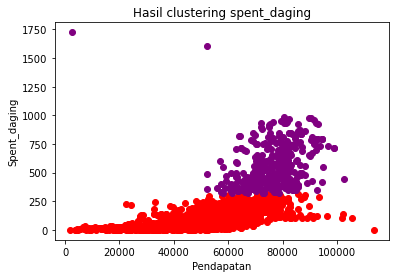

In [80]:
#Plot hasil scatter spent_daging
plt.scatter(res_daging_0['Pendapatan'],res_daging_0['Spent_daging'],color='red')
plt.scatter(res_daging_1['Pendapatan'],res_daging_1['Spent_daging'],color='purple')

plt.xlabel('Pendapatan')
plt.ylabel('Spent_daging')
plt.title('Hasil clustering spent_daging')
plt.show()

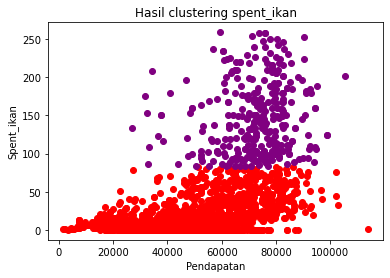

In [81]:
#Plot hasil scatter spent_ikan
plt.scatter(res_ikan_0['Pendapatan'],res_ikan_0['Spent_ikan'],color='red')
plt.scatter(res_ikan_1['Pendapatan'],res_ikan_1['Spent_ikan'],color='purple')

plt.xlabel('Pendapatan')
plt.ylabel('Spent_ikan')
plt.title('Hasil clustering spent_ikan')
plt.show()

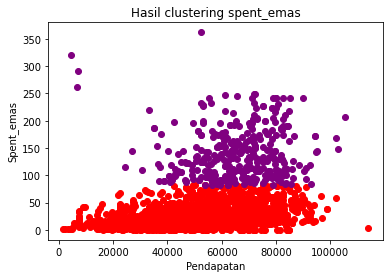

In [82]:
#Plot hasil scatter spent_emas
plt.scatter(res_emas_0['Pendapatan'],res_emas_0['Spent_emas'],color='red')
plt.scatter(res_emas_1['Pendapatan'],res_emas_1['Spent_emas'],color='purple')

plt.xlabel('Pendapatan')
plt.ylabel('Spent_emas')
plt.title('Hasil clustering spent_emas')
plt.show()

### EDA

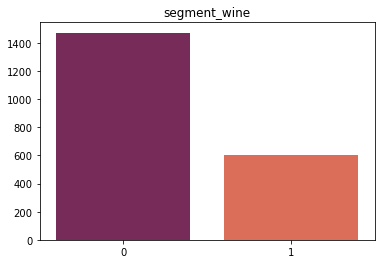

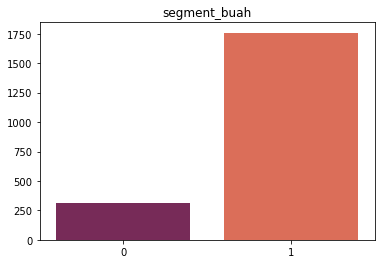

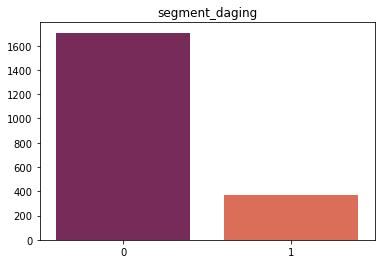

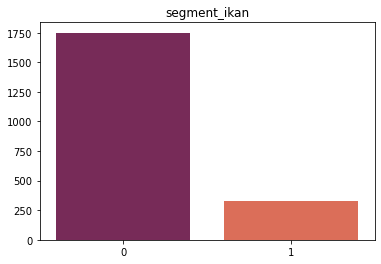

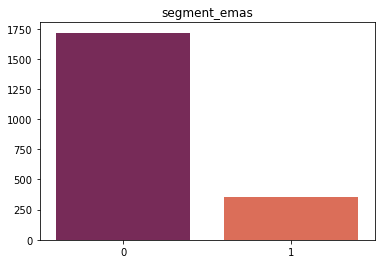

In [87]:
#Menampilkan proporsi setiap segment di masing - masing produk
list_res_segment = ["segment_wine", "segment_buah","segment_daging","segment_ikan","segment_emas"]
for i in list_res_segment:
    categories = results[i].value_counts().index
    counts = results[i].value_counts().values
    sns.barplot(x=categories, y=counts, palette="rocket")
    plt.title(i)
    plt.show() 

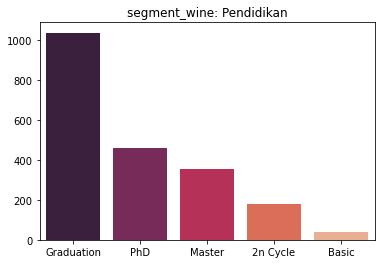

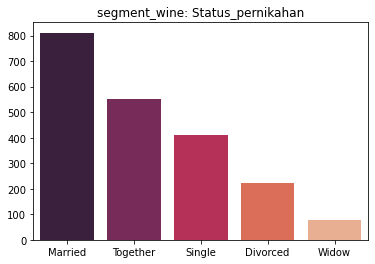

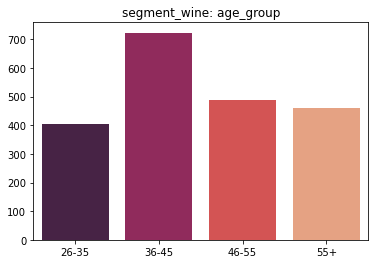

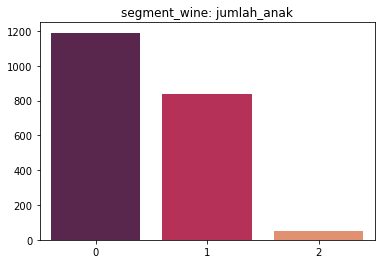

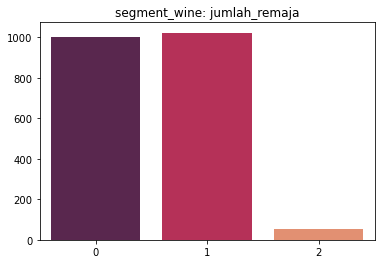

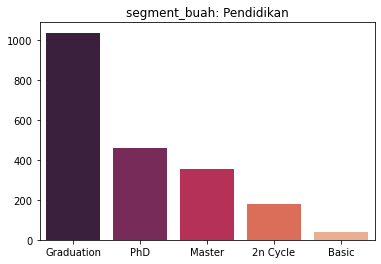

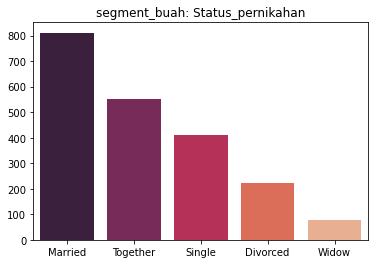

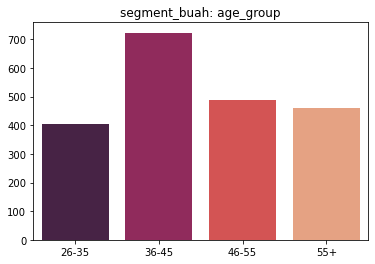

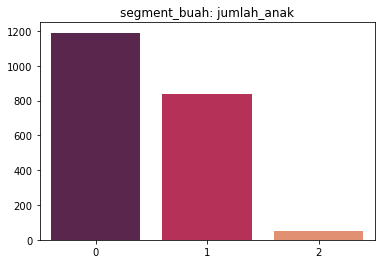

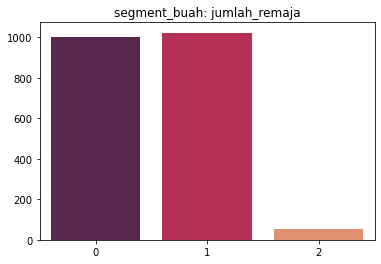

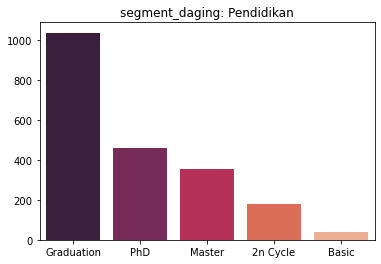

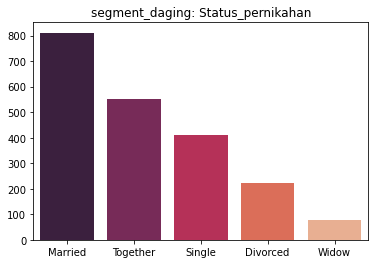

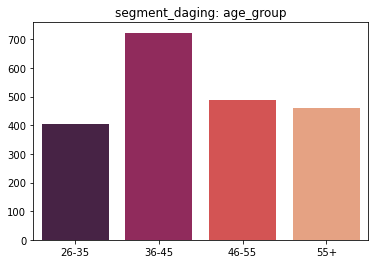

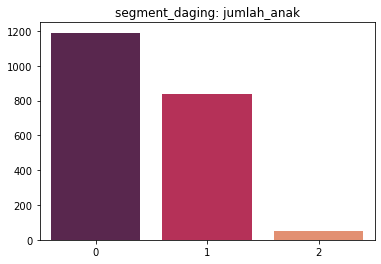

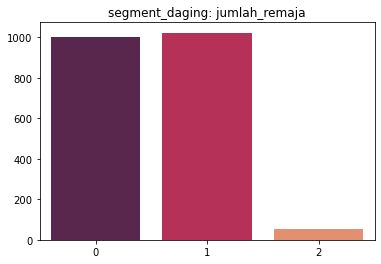

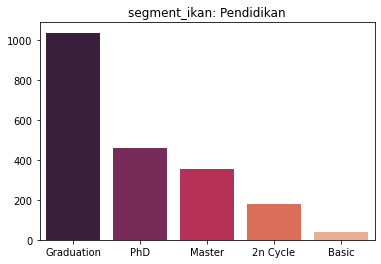

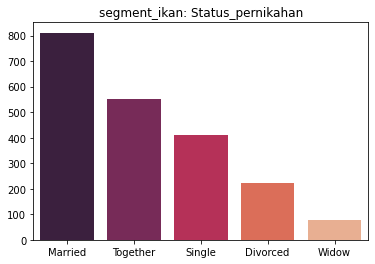

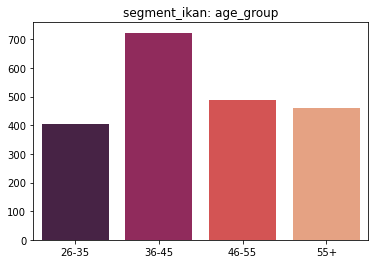

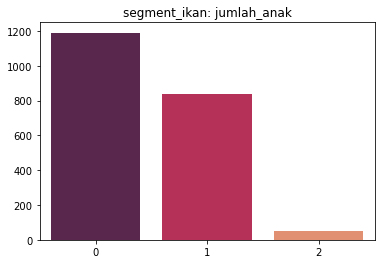

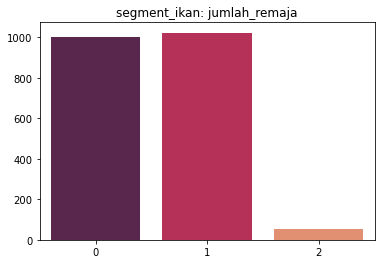

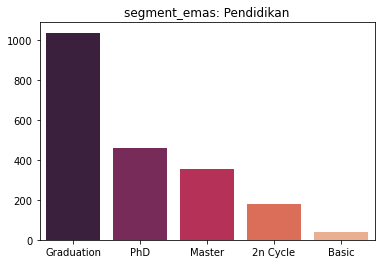

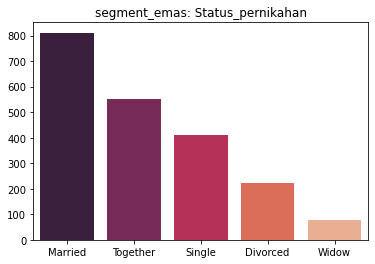

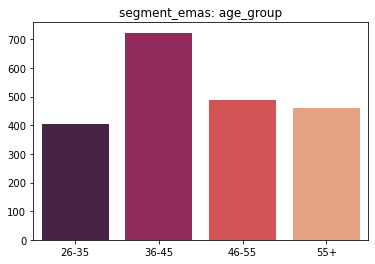

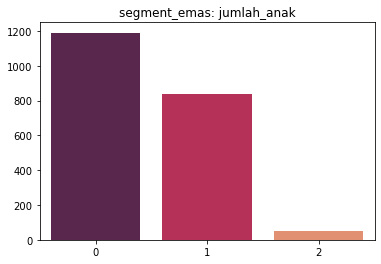

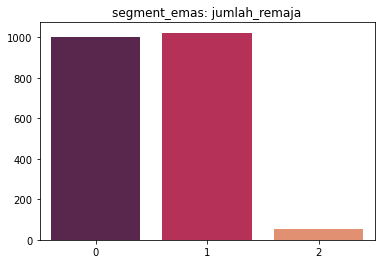

In [84]:

segment_list = ["segment_wine", "segment_buah", "segment_daging", "segment_ikan", "segment_emas"]

categorical = results[['Pendidikan', 'Status_pernikahan', 'age_group','jumlah_anak','jumlah_remaja']]

for segment in segment_list:
    segment_data = results[[segment] + categorical.columns.tolist()]
    
    for category in categorical.columns:
        categories = segment_data[category].value_counts().index
        counts = segment_data[category].value_counts().values
        
        sns.barplot(x=categories, y=counts, palette='rocket')
        plt.title(segment + ': ' + category)
        plt.show()


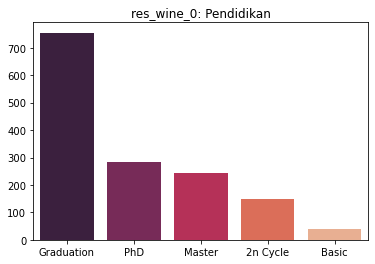

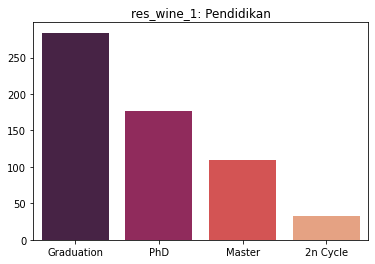

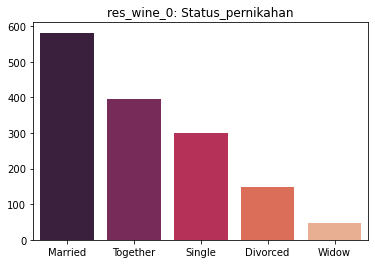

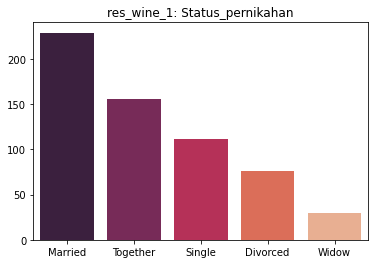

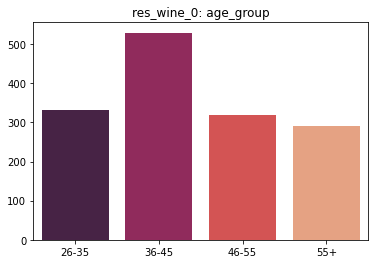

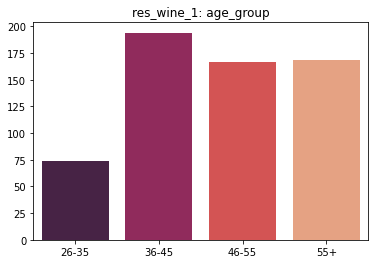

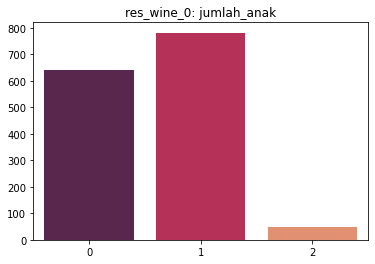

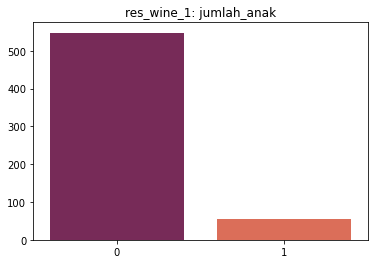

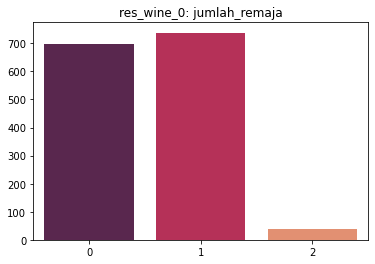

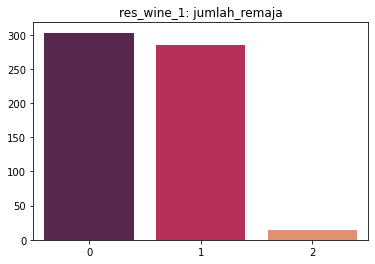

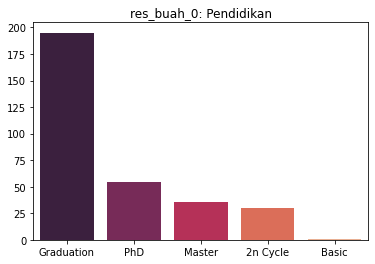

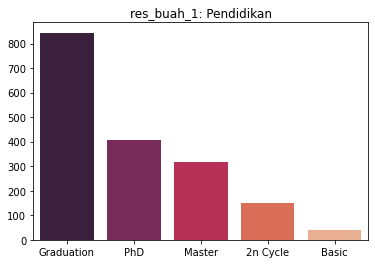

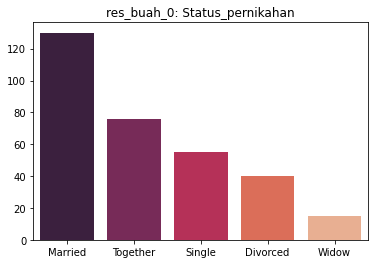

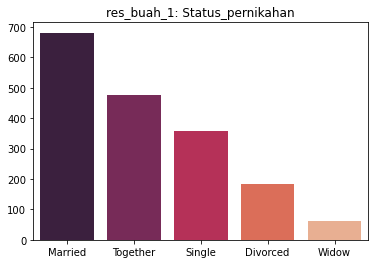

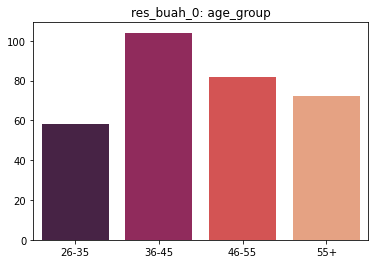

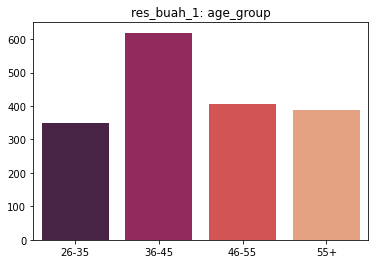

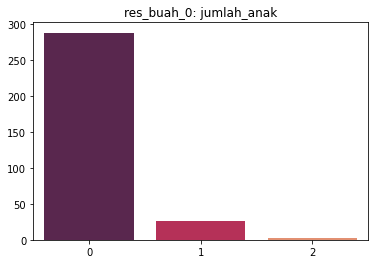

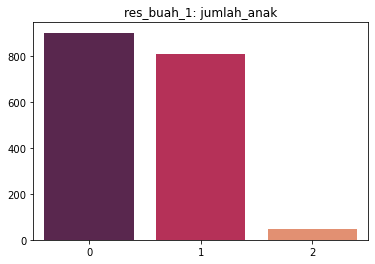

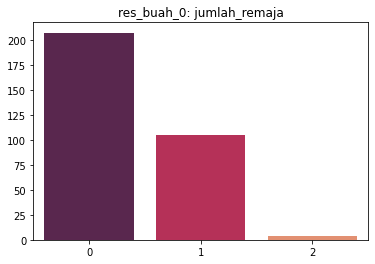

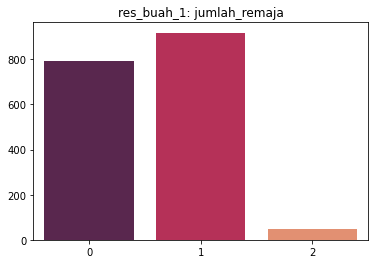

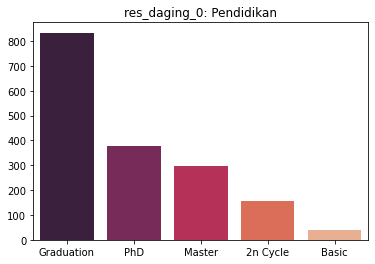

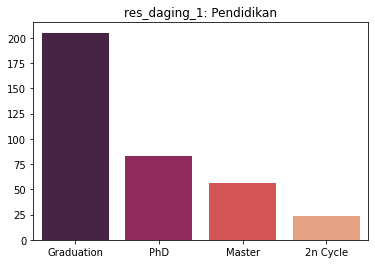

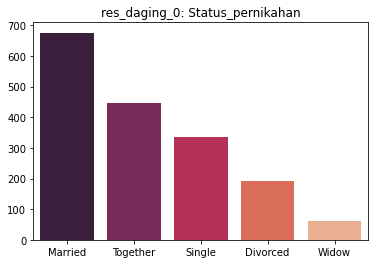

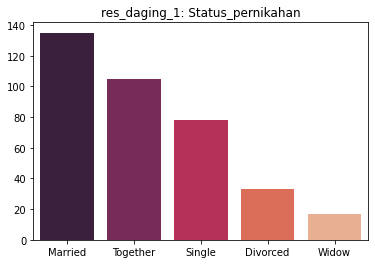

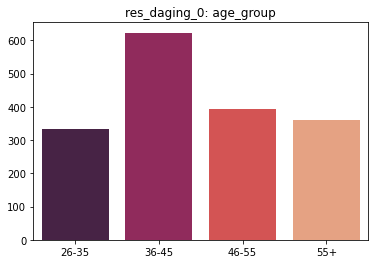

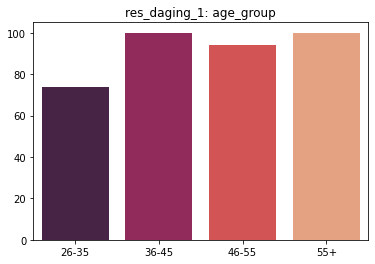

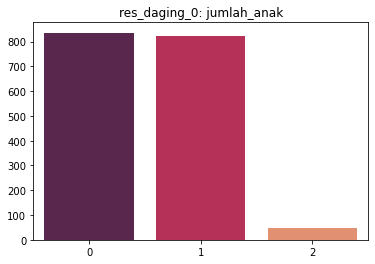

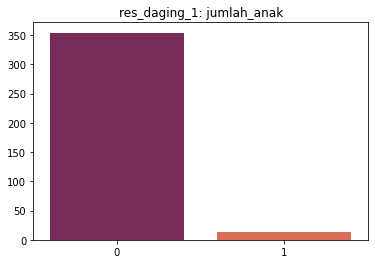

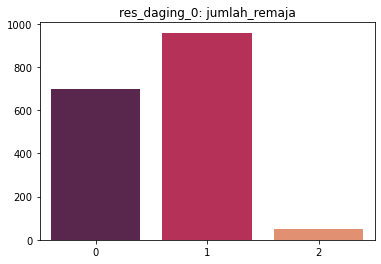

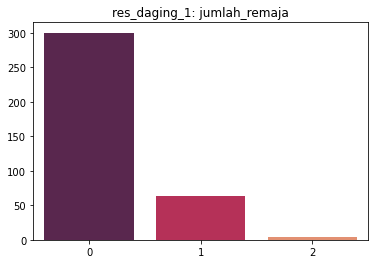

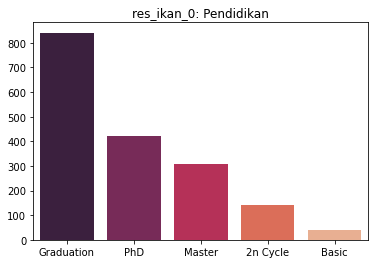

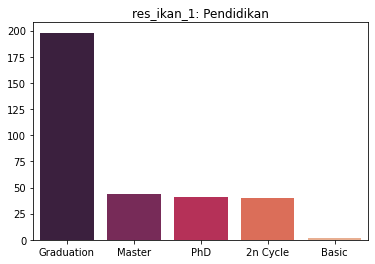

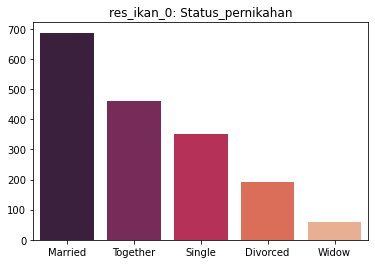

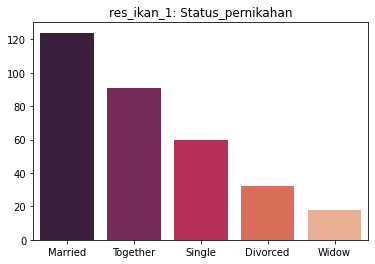

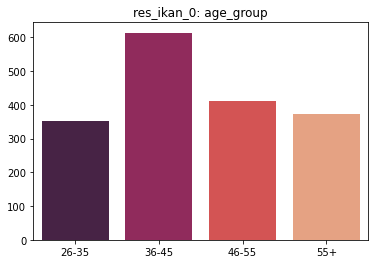

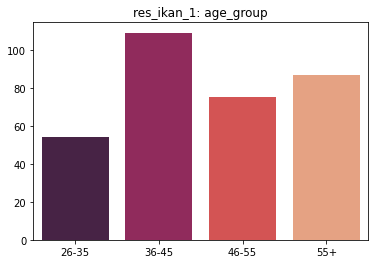

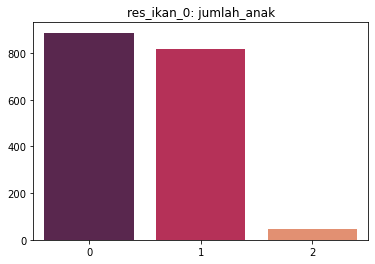

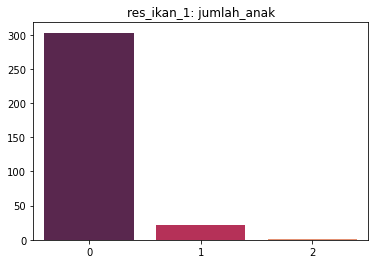

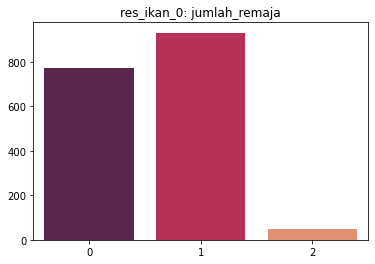

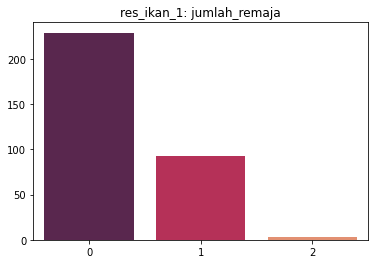

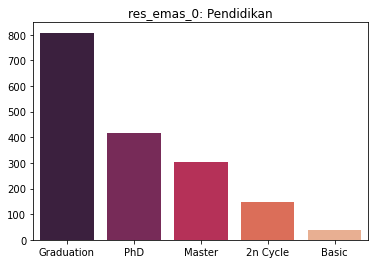

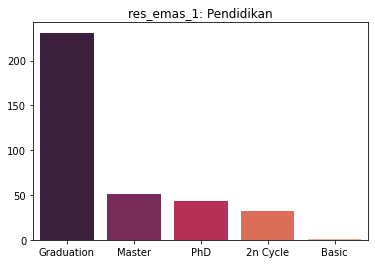

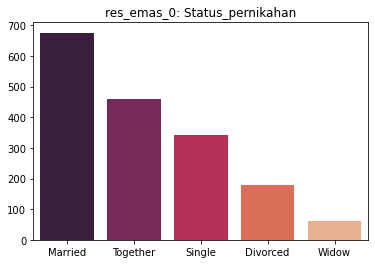

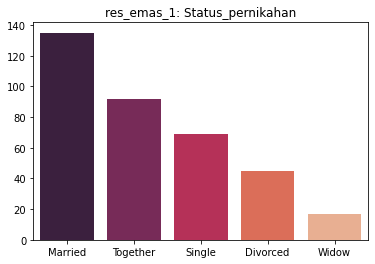

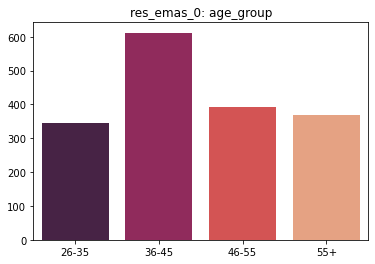

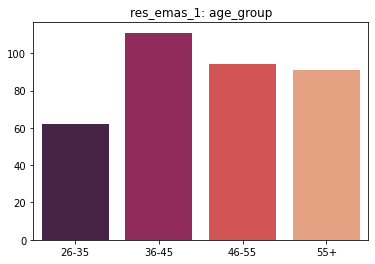

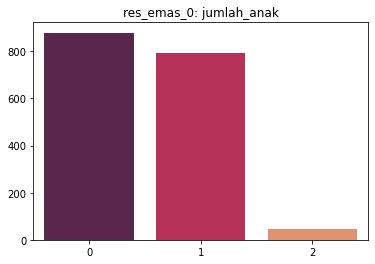

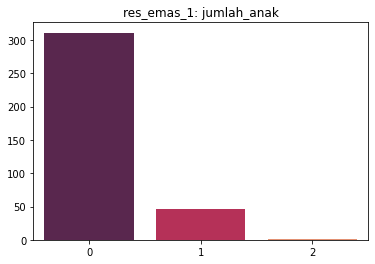

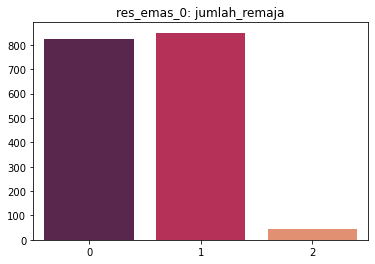

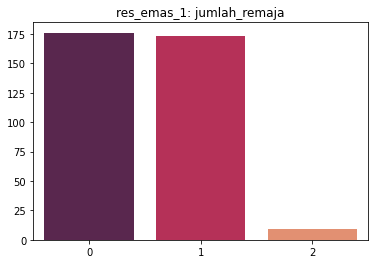

In [85]:
segment_list = ["segment_wine", "segment_buah", "segment_daging", "segment_ikan", "segment_emas"]
segment_list_str = ["wine", "buah", "daging", "ikan", "emas"]

categorical = results[['Pendidikan', 'Status_pernikahan', 'age_group', 'jumlah_anak', 'jumlah_remaja']]

for i, j in zip(segment_list, segment_list_str):
    for k in categorical:
        categories = results[results[i] == 0][k].value_counts().index
        counts = results[results[i] == 0][k].value_counts().values
        sns.barplot(x=categories, y=counts, palette='rocket')
        plt.title(f'res_{j}_0: {k}')
        plt.show()
        
        categories = results[results[i] == 1][k].value_counts().index
        counts = results[results[i] == 1][k].value_counts().values
        sns.barplot(x=categories, y=counts, palette='rocket')
        plt.title(f'res_{j}_1: {k}')
        plt.show()


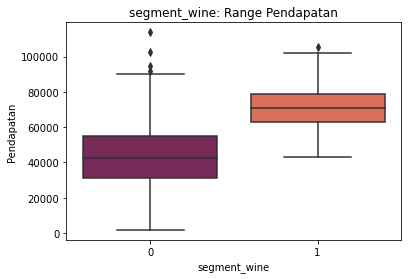

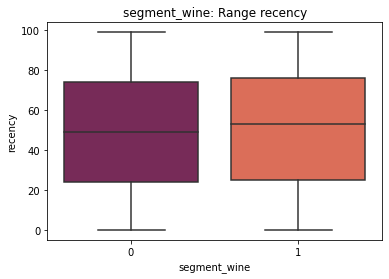

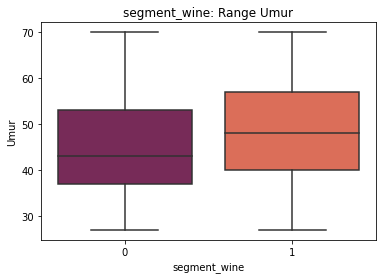

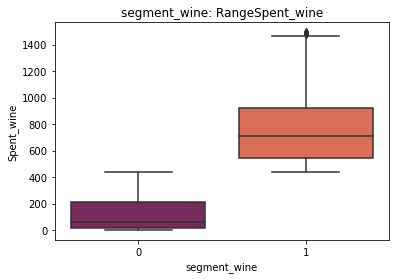

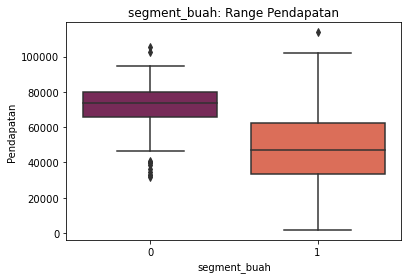

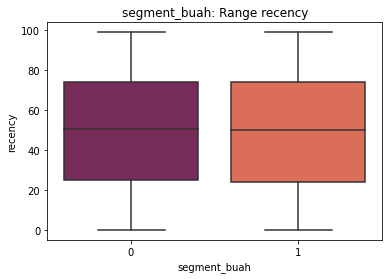

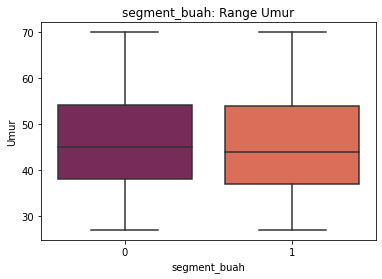

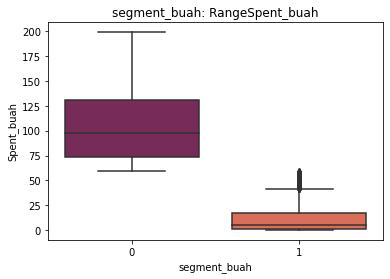

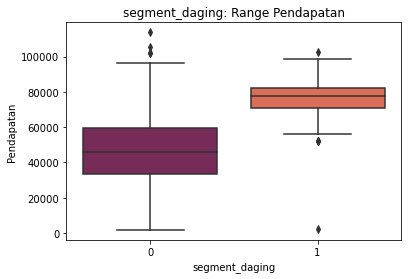

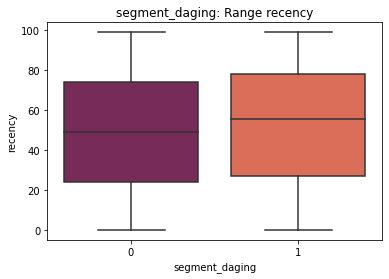

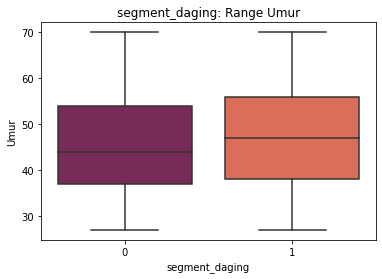

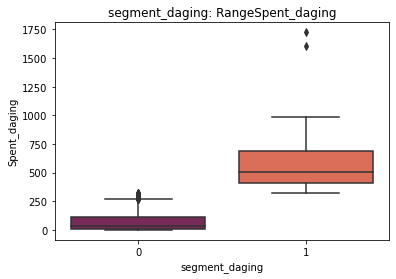

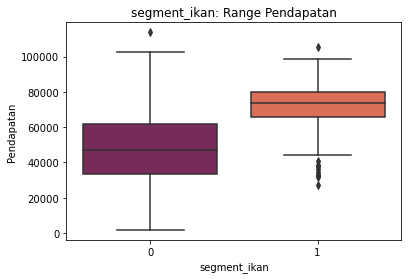

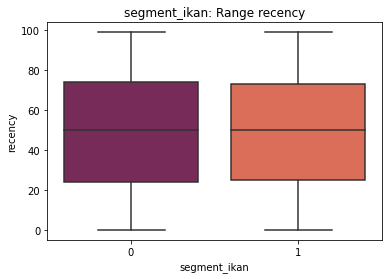

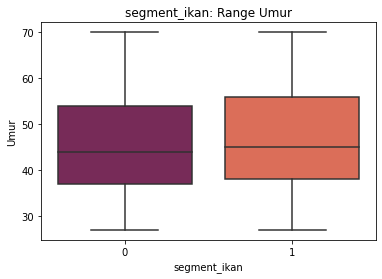

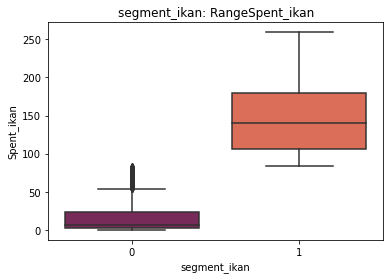

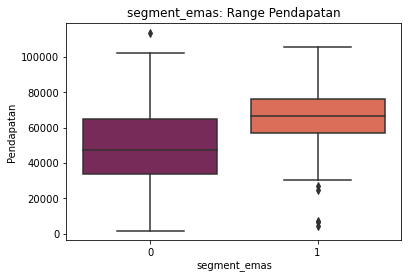

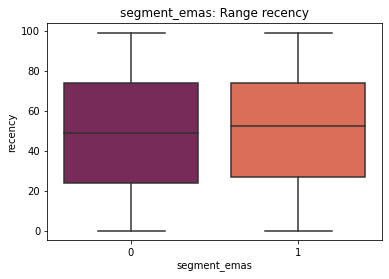

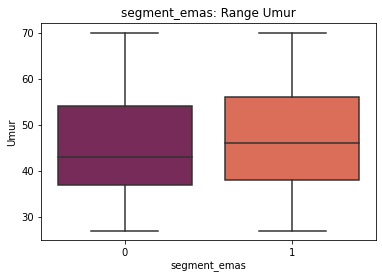

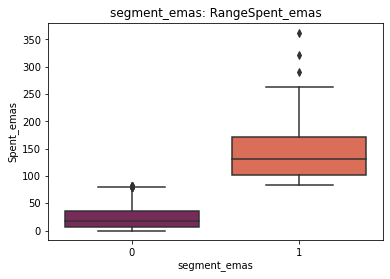

In [86]:
segment_cols = ['segment_wine','segment_buah','segment_daging','segment_ikan','segment_emas']
numerik_cols = ['Pendapatan','recency','Umur']
spent_cols = ['Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas']
for i,k in zip(segment_cols,spent_cols):
    for j in numerik_cols:
        sns.boxplot(x = results[i], y = results[j], data=results, palette = 'rocket')
        plt.title(i + ': Range '+j)
        plt.show()
    sns.boxplot(x = results[i], y=results[k], data=results, palette = 'rocket')
    plt.title(i+ ': Range' +k)
    plt.show()

### KESIMPULAN/SARAN